Primero importamos las librerías que vamos a necesitar para nuestro modelo de regresión logística

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import statsmodels.api as sm
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

Ahora introducimos la ruta en la que guardamos el archivo con los datos que se analizarán y tambíen aprovechamos para ahcer un pequeño ajuste en la visualización del dataframe.

In [2]:
train = pd.read_csv('Datos/train.csv')
X_test = pd.read_csv('Datos/test.csv')
X_test
y_test = pd.read_csv('Datos/gender_submission.csv')
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [3]:
def hotdeck_age(x):
    for column in train.columns:
        # Encontrar índices donde hay valores faltantes
        missing_indices = x[x["Age"].isnull()].index
        
        for idx in missing_indices:
            # Seleccionar filas no faltantes
            non_missing_values = x["Age"].dropna()
            # Elegir un valor aleatorio de las filas no faltantes
            random_value = non_missing_values.sample(n=1).values[0]
            # Imputar el valor aleatorio en el índice correspondiente
            x.at[idx, "Age"] = random_value
            
    return x

In [4]:
def hotdeck_embarked(x):
    for column in x.columns:
        # Encontrar índices donde hay valores faltantes
        missing_indices = x[x["Embarked"].isnull()].index
        
        for idx in missing_indices:
            # Seleccionar filas no faltantes
            non_missing_values = x["Embarked"].dropna()
            # Elegir un valor aleatorio de las filas no faltantes
            random_value = non_missing_values.sample(n=1).values[0]
            # Imputar el valor aleatorio en el índice correspondiente
            x.at[idx, "Embarked"] = random_value
            
    return x

In [5]:
def hotdeck_fare(x):
    for column in x.columns:
        # Encontrar índices donde hay valores faltantes
        missing_indices = x[x["Fare"].isnull()].index
        
        for idx in missing_indices:
            # Seleccionar filas no faltantes
            non_missing_values = x["Fare"].dropna()
            # Elegir un valor aleatorio de las filas no faltantes
            random_value = non_missing_values.sample(n=1).values[0]
            # Imputar el valor aleatorio en el índice correspondiente
            x.at[idx, "Fare"] = random_value
            
    return x

Ahora aplicamos la función a nuestro dataframe

In [6]:
train = hotdeck_age(train)
train = hotdeck_embarked(train)

Podemos visualizar la forma resultante de la variable con la imputación realizada

Vamos a crear variables dummies

In [7]:
train = pd.get_dummies(train, columns = ['Sex', 'Pclass', 'Embarked'], drop_first=True, dtype=float)

In [8]:
X_train = train[["Age", "SibSp", "Parch", "Fare", "Sex_male", "Pclass_2", "Pclass_3", "Embarked_Q", "Embarked_S"]]
Y_train = train[["Survived"]]

c:\Users\luis_lopezg\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\luis_lopezg\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-

Modelo 1: Lineal: Mean accuracy = 0.8026819923371649, Std = 0.07029894412572386


c:\Users\luis_lopezg\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\luis_lopezg\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-

Modelo 2: Cuadrático: Mean accuracy = 0.7991187739463601, Std = 0.05977503909375333


c:\Users\luis_lopezg\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\luis_lopezg\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-

Modelo 3: Cúbico: Mean accuracy = 0.7789655172413792, Std = 0.06386306611933876


c:\Users\luis_lopezg\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\luis_lopezg\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-

Model 4: grado 4: Mean accuracy = 0.7342911877394637, Std = 0.07740625268457904


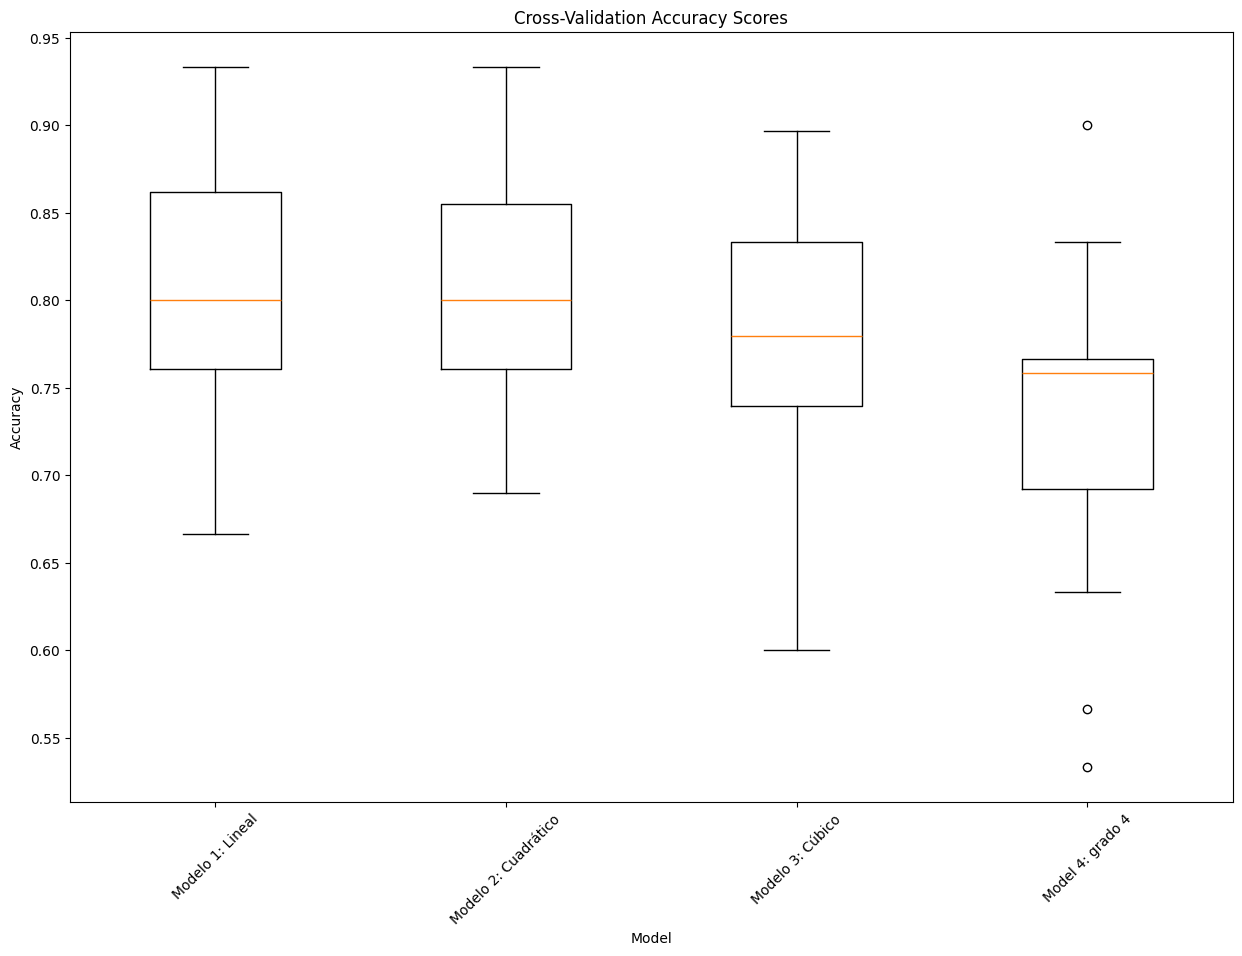

In [9]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Supongamos que tienes tus datos en X_train y Y_train
X_train = train[["Age", "SibSp", "Parch", "Fare", "Sex_male", "Pclass_2", "Pclass_3", "Embarked_Q", "Embarked_S"]]
Y_train = train["Survived"]

# Definir los modelos con diferentes combinaciones de polinomios de grado 2 y 3
models = {
    'Modelo 1: Lineal': LogisticRegression(),
    'Modelo 2: Cuadrático': Pipeline([
        ('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)),
        ('logistic', LogisticRegression())
    ]),
    'Modelo 3: Cúbico': Pipeline([
        ('poly', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)),
        ('logistic', LogisticRegression())
    ]),
    'Model 4: grado 4': Pipeline([
        ('poly', PolynomialFeatures(degree=4, include_bias=True, interaction_only=False)),
        ('logistic', LogisticRegression())
    ])
}

kf = KFold(n_splits=30)  # Aquí usamos 10 folds

results = {}

for model_name, model in models.items():
    scores = cross_val_score(model, X_train, Y_train, cv=kf, scoring='accuracy')
    results[model_name] = scores
    print(f'{model_name}: Mean accuracy = {np.mean(scores)}, Std = {np.std(scores)}')

# Graficar los resultados
plt.figure(figsize=(15, 10))
plt.boxplot(results.values(), labels=results.keys())
plt.title('Cross-Validation Accuracy Scores')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.show()

In [29]:
X_test = hotdeck_age(X_test)

In [30]:
X_test = hotdeck_fare(X_test)

In [31]:
X_test = pd.get_dummies(X_test, columns = ['Sex', 'Pclass', 'Embarked'], drop_first=True, dtype=float)

KeyError: "None of [Index(['Sex', 'Pclass', 'Embarked'], dtype='object')] are in the [columns]"

In [14]:
y_test = y_test[["Survived"]]

In [15]:
X_test = X_test[["Age", "SibSp", "Parch", "Fare", "Sex_male", "Pclass_2", "Pclass_3", "Embarked_Q", "Embarked_S"]]

In [16]:
X_train.head(3)

,Age,SibSp,Parch,Fare,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,22.0,1,0,7.2500,1.0,0.0,1.0,0.0,1.0
1,38.0,1,0,71.2833,0.0,0.0,0.0,0.0,0.0
2,26.0,0,0,7.9250,0.0,0.0,1.0,0.0,1.0


In [17]:
X_test = X_test[["Age", "SibSp", "Parch", "Fare", "Sex_male", "Pclass_2", "Pclass_3", "Embarked_Q", "Embarked_S"]]

In [18]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm

In [19]:
smote = SMOTE()
X_train_balanced, Y_train_balanced = smote.fit_resample(X_train, Y_train)

In [20]:
X_train_balanced = X_train_balanced[["Age", "SibSp", "Parch", "Fare", "Sex_male", "Pclass_2", "Pclass_3", "Embarked_Q", "Embarked_S"]]

Accuracy on test set: 0.916267942583732


c:\Users\luis_lopezg\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


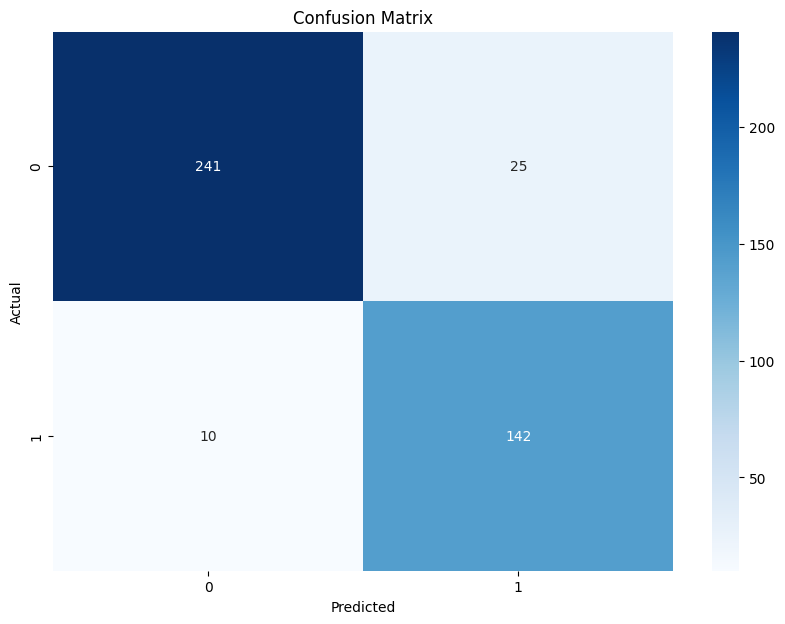

In [35]:
# Definir el modelo cuadrático
model = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)),
    ('logistic', LogisticRegression())
])

# Entrenar el modelo con el conjunto de entrenamiento completo
model.fit(X_train_balanced, Y_train_balanced)

# Evaluar el modelo con el conjunto de test
Y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, Y_pred)

print(f'Accuracy on test set: {accuracy}')

# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_test, Y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [22]:
Y_pred = pd.DataFrame(Y_pred, columns=['Survived'])

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Calcular métricas
accuracy = accuracy_score(y_test, Y_pred)
precision = precision_score(y_test, Y_pred)
recall = recall_score(y_test, Y_pred)
f1 = f1_score(y_test, Y_pred)
roc_auc = roc_auc_score(y_test, Y_pred)

# Mostrar resultados
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"ROC-AUC: {roc_auc}")

# Mostrar matriz de confusión y reporte de clasificación
print(confusion_matrix(y_test, Y_pred))
print(classification_report(y_test, Y_pred))

Accuracy: 0.916267942583732
Precision: 0.8502994011976048
Recall: 0.9342105263157895
F1-Score: 0.890282131661442
ROC-AUC: 0.9201127819548871
[[241  25]
 [ 10 142]]
              precision    recall  f1-score   support

           0       0.96      0.91      0.93       266
           1       0.85      0.93      0.89       152

    accuracy                           0.92       418
   macro avg       0.91      0.92      0.91       418
weighted avg       0.92      0.92      0.92       418



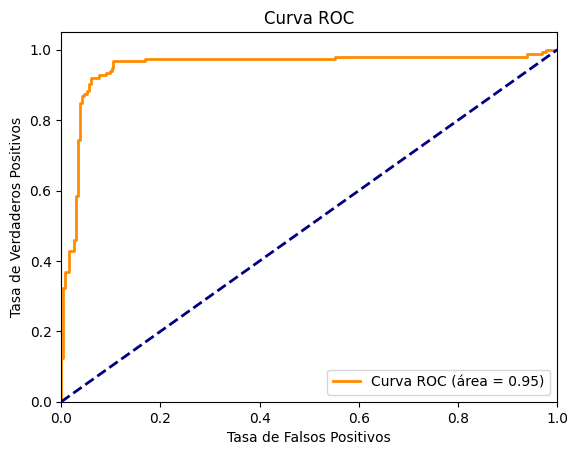

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calcular la curva ROC
fpr, tpr, _ = roc_curve(y_test, Y_pred)
roc_auc = auc(fpr, tpr)

Y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, Y_pred_prob)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (área = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()